# Projeto final do curso de Machine Learning II da ADA

## Premissa


Como forma de avaliação e validação dos conhecimento adquiridos durante o módulo "*Machine Lerning I*" no curso de *Data Science* ministrado pelo professor [Professor](), na instituição [**Ada Tech**](https://ada.tech/), foi proposto um trabalho final que utilize os conhecimentos demonstrados e adquiridos durante a execução do curso.

O trabalho consiste em escolher um dataset de domínio publico e aplicar as ferramentas aprendidas em aula, de forma a obter, um modelo de aprendizado de máquina, capaz de categorizar e generalizar respostas em consistencia com o banco de dados no qual foi utilizado para o seu treinamento.

## Alunos/Autores

Os alunos que desenvolveram o trabalho foram:
- [Carolina Rutili de Lima](https://www.linkedin.com/in/carolinarutili/)
- [Hugo Cezar Sales de Souza](https://www.linkedin.com/in/hugo-cs-souza/)


## Escolha do Dataset

O [dataset escolhido](https://www.kaggle.com/datasets/princeiornongu/merged-cc), visando aplicar os conhecimento aprendidos em aula em conceitos práticos, nos reune conhecimentos sobre a variação da temperatura de regiões do planeta ao longo do século passado até os dias atuais (mais precisamente, do ano de 1961 e 2022). 

O dataset corresponde em apenas uma tabela que contém o País, sua respectiva sigla em ISO3, o indicador, as temperaturas médias coletadas por ano, a região do globo no qual esta região se encontra, a unidade de temperatura e a fonte.

No documento explicativo do kaggle, é informado que o dataset é bastante utilizado para ferramentas de machine learning como regressão, classificação, clusterização, série temporais etc. O que torna o dataset uma boa escolha para demonstrativo de conhecimentos sobre a disciplina.



## Objetivo

O objetivo deste trabalho é utilizar o dataset sobre movimento da médias de temperaturas do globo para gerar insights sobre o comportamento global sobre a temperatura, além de conseguir classificar o que está acontecendo com o clima durante os anos.

## Desenvolvimento


### Ferramentas utilizadas

As ferramentas/conhecimentos utilizados no desenvolvimento deste trabalho serão:
- Python e Jupyter Notebook
- Pandas, Numpy e Seaborn
- SVM (*Support Vector Machines*)
- Métricas de Avaliação de Modelos de Classificação
- Otimização de hiperparâmetros

### Execução do código

#### Inicialização e verificação das variáveis essenciais para o modelo

##### Importação das bibliotecas

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.impute import  SimpleImputer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC

##### Importação do dataset e análise inicial sobre as variáveis disponíveis

In [126]:
# Carregar data set
df = pd.read_csv('../dataset/new_data.csv')

# verificar valores
print(df.head())

               Country ISO3   1961   1962   1963   1964   1965   1966   1967  \
0              Albania  ALB  0.627  0.326  0.075 -0.166 -0.388  0.559 -0.074   
1              Algeria  DZA  0.164  0.114  0.077  0.250 -0.100  0.433 -0.026   
2       American Samoa  ASM  0.079 -0.042  0.169 -0.140 -0.562  0.181 -0.368   
3               Angola  AGO  0.041 -0.152 -0.190 -0.229 -0.196  0.175 -0.081   
4  Antigua and Barbuda  ATG  0.090  0.031  0.288  0.214 -0.385  0.097 -0.192   

    1968  ...   2017   2018   2019   2020   2021   2022  \
0  0.081  ...  1.121  2.028  1.675  1.498  1.536  1.518   
1 -0.067  ...  1.512  1.210  1.115  1.926  2.330  1.688   
2 -0.187  ...  1.435  1.189  1.539  1.430  1.268  1.256   
3 -0.193  ...  0.870  1.395  1.752  1.162  1.553  1.212   
4 -0.225  ...  0.958  0.627  0.797  1.131  0.862  0.770   

                   Sub-Region         Income Group  Area (KM²)  Density (KM²)  
0       Europe & Central Asia  Upper middle income     28748.0            103  
1  M

In [127]:
# Verificar distribuição de paises por região
df["Sub-Region"].value_counts(normalize = True)

Sub-Region
Europe & Central Asia         0.248227
Latin America & Caribbean     0.219858
Sub-Saharan Africa            0.212766
East Asia & Pacific           0.148936
Middle East & North Africa    0.106383
South Asia                    0.049645
North America                 0.014184
Name: proportion, dtype: float64

In [128]:
#Verificar a distribuição da condição econômica dos países 
df["Income Group"].value_counts(normalize = True)

Income Group
High income            0.397163
Lower middle income    0.255319
Upper middle income    0.248227
Low income             0.099291
Name: proportion, dtype: float64

In [129]:
#Selecionando apenas colunas numéricas
df_num = df.select_dtypes(include= np.number)
df_num.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2015,2016,2017,2018,2019,2020,2021,2022,Area (KM²),Density (KM²)
0,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518,28748.0,103
1,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688,2381741.0,19
2,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256,199.0,220
3,0.041,-0.152,-0.190,-0.229,-0.196,0.175,-0.081,-0.193,0.188,0.248,...,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212,1246700.0,29
4,0.090,0.031,0.288,0.214,-0.385,0.097,-0.192,-0.225,0.271,0.109,...,1.035,1.097,0.958,0.627,0.797,1.131,0.862,0.770,442.0,214


In [130]:
# Utilizar os dados para conseguir classificar através da variação da temperatura e da área e densidade
X = df_num
y = df["Sub-Region"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [131]:
#Verificar se a estratificação para manter a proporção dos dados de teste e treinamento parecidas
y_train.value_counts(dropna = False, normalize=  True)

Sub-Region
Europe & Central Asia         0.244898
Latin America & Caribbean     0.224490
Sub-Saharan Africa            0.214286
East Asia & Pacific           0.153061
Middle East & North Africa    0.102041
South Asia                    0.051020
North America                 0.010204
Name: proportion, dtype: float64

In [132]:
y_test.value_counts(dropna = False, normalize=  True)

Sub-Region
Europe & Central Asia         0.255814
Sub-Saharan Africa            0.209302
Latin America & Caribbean     0.209302
East Asia & Pacific           0.139535
Middle East & North Africa    0.116279
South Asia                    0.046512
North America                 0.023256
Name: proportion, dtype: float64

In [133]:
svc = SVC(random_state = 0, C = 10**6)
svc.fit(X_train, y_train)

SVC(C=1000000, random_state=0)

------------------------------ Resultado Treino ------------------------------
                            precision    recall  f1-score   support

       East Asia & Pacific       0.75      0.20      0.32        15
     Europe & Central Asia       0.30      0.58      0.40        24
 Latin America & Caribbean       0.36      0.59      0.45        22
Middle East & North Africa       1.00      0.20      0.33        10
             North America       1.00      1.00      1.00         1
                South Asia       1.00      0.40      0.57         5
        Sub-Saharan Africa       0.86      0.29      0.43        21

                  accuracy                           0.42        98
                 macro avg       0.75      0.47      0.50        98
              weighted avg       0.62      0.42      0.41        98

------------------------------ Matriz de confusão ------------------------------


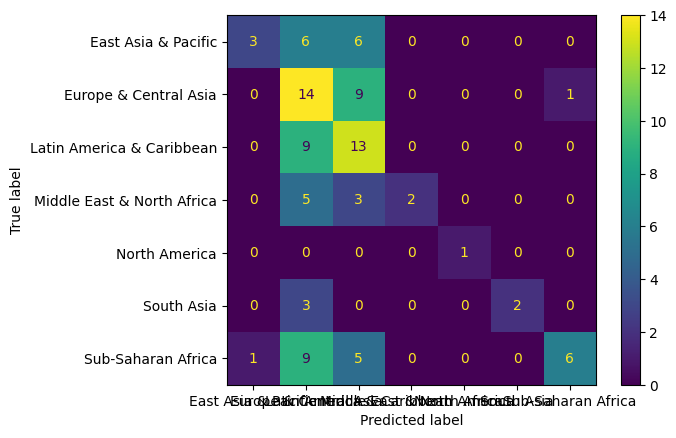

In [134]:
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print('--'*15,'Resultado Treino','--'*15)
print(classification_report(y_train , y_pred_train))
print('--'*15,'Matriz de confusão','--'*15)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)

------------------------------ Resultado Teste ------------------------------
                            precision    recall  f1-score   support

       East Asia & Pacific       0.00      0.00      0.00         6
     Europe & Central Asia       0.38      0.55      0.44        11
 Latin America & Caribbean       0.31      0.56      0.40         9
Middle East & North Africa       0.00      0.00      0.00         5
             North America       1.00      1.00      1.00         1
                South Asia       0.00      0.00      0.00         2
        Sub-Saharan Africa       0.50      0.33      0.40         9

                  accuracy                           0.35        43
                 macro avg       0.31      0.35      0.32        43
              weighted avg       0.29      0.35      0.30        43

------------------------------ Matriz de confusão ------------------------------


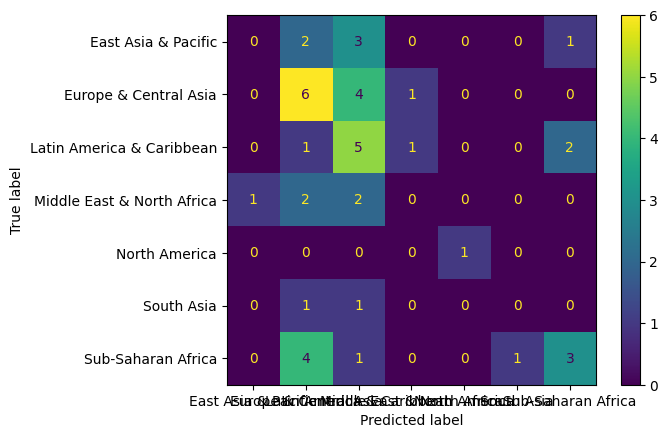

In [135]:
print('--'*15,'Resultado Teste','--'*15)
print(classification_report(y_test , y_pred_test))
print('--'*15,'Matriz de confusão','--'*15)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)